In [7]:
import numpy as np
import matplotlib.pyplot as p
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf




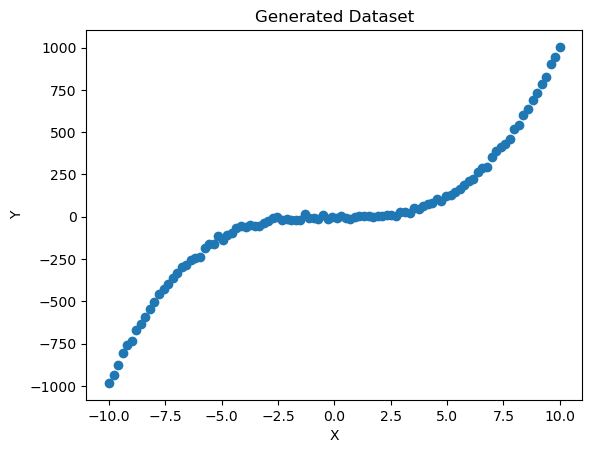

In [2]:
np.random.seed(0)
tf.random.set_seed(0)
# Generate a dataset


x = np.linspace(-10, 10, 100)
y = x**3 + np.random.normal(0, 10, 100)

import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Dataset')
plt.show()




In [3]:

# Scale the input data
scaler = StandardScaler()
x = scaler.fit_transform(x.reshape(-1, 1))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [8]:
# Create a neural network with L2  regularization
# Build a deep neural network model with a large number of hidden units
model_L2 = Sequential([
    Dense(100, input_shape=(1,), activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.2)),
    Dense(1)

])



In [9]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)


In [10]:
# Compile the model
model_L2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_L2.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0,callbacks=[es])

#Evaluate the model
training_loss = model_L2.evaluate(x_train, y_train, verbose=0)
test_loss = model_L2.evaluate(x_test, y_test, verbose=0)

print(f'Training loss: {training_loss:.4f}')
print(f'Test loss: {test_loss:.4f}')

Training loss: 536.0251
Test loss: 507.4920
